### Example 6.6 Cliff Walking

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n_cols=12
n_rows=4

actions=[0,1,2,3] #up,down,left,right
n_a=len(actions)

START=[3,0]
GOAL=[3,11]
CLIFF=list(range(1,11))

def step(s,a):
    
    row,col=s
    
    if a==0: #up
        s_=[max(row-1,0),col]
    elif a==1: #down
        s_=[min(row+1,n_rows-1),col]
    elif a==2: #left
        s_=[row, max(col-1,0)]
    else: #right
        s_=[row, min(col+1, n_cols-1)]
        
    if s_==GOAL:
        return s_,0,True
    elif s_[0]==n_rows-1 and s_[1] in CLIFF:
        return s_,-100,True
    else:
        return s_,-1,False
             
def e_greedy(eps,q):
    
    if (np.random.random()<=eps):
        return np.random.choice(actions)
    else:
        return np.argmax(q)
             
def run_sarsa(n_eps=500,n_stps=500,eps=.5,lr=0.5,gm=1.):

    Q=np.zeros((n_rows,n_cols,n_a))

    r_all,stp_all,cnt_all=[],[],[]
    stpCnt=0
    
    eps_decay=0.99

    for ep in range(n_eps):

        r_sum,done=0,False
        s=START    
        a=e_greedy(eps,Q[s[0],s[1]]) 
        eps*=eps_decay

        for stp in range(n_stps):

            s_,r,done=step(s,a)
            a_=e_greedy(eps,Q[s_[0],s_[1]])
            delta=r+gm*Q[s_[0],s_[1],a_]-Q[s[0],s[1],a]
            Q[s[0],s[1],a]+=lr*delta

            s=s_
            a=a_
            r_sum+=r
            stpCnt+=1

            if done:
                break

        r_all.append(r_sum)
        stp_all.append(stp)
        cnt_all.append(stpCnt)

        #if ep%100==0:
        #    print(f'ep:{ep}, stps:{stp}, ret:{r_sum}')
    
    return Q,r_all,stp_all,cnt_all

#Q_sarsa,r_sarsa,stp_sarsa,cnt_sarsa=run_sarsa()

n_runs=50

r_sarsa_all=[]
for n in range(n_runs):
    Q_sarsa,r_sarsa,stp_sarsa,cnt_sarsa=run_sarsa()
    r_sarsa_all.append(r_sarsa)

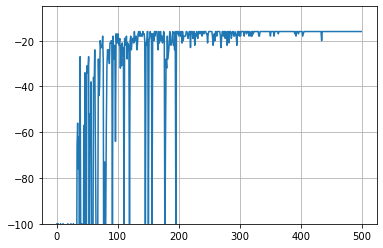

In [2]:
plt.plot(r_sarsa)
plt.ylim([-100,-5])
plt.grid()

In [3]:
def run_q(n_eps=500,n_stps=500,eps=.5,lr=0.5,gm=1.):

    Q=np.zeros((n_rows,n_cols,n_a))

    r_all,stp_all,cnt_all=[],[],[]
    stpCnt=0
    eps_decay=0.99

    for ep in range(n_eps):

        r_sum,done=0,False
        s=START    
        eps*=eps_decay
        

        for stp in range(n_stps):
            
            a=e_greedy(eps,Q[s[0],s[1]]) 
            s_,r,done=step(s,a)
            delta=r+gm*np.max(Q[s_[0],s_[1]])-Q[s[0],s[1],a]
            Q[s[0],s[1],a]+=lr*delta

            s=s_
            r_sum+=r
            stpCnt+=1

            if done:
                break

        r_all.append(r_sum)
        stp_all.append(stp)
        cnt_all.append(stpCnt)

        #if ep%100==0:
        #    print(f'ep:{ep}, stps:{stp}, ret:{r_sum}')
    
    return Q,r_all,stp_all,cnt_all

n_runs=50

r_q_all=[]
for n in range(n_runs):
    Q_q,r_q,stp_q,cnt_q=run_q()
    r_q_all.append(r_q)

In [4]:
#clipped_data = data[(-1 > data) | (data > 1)]

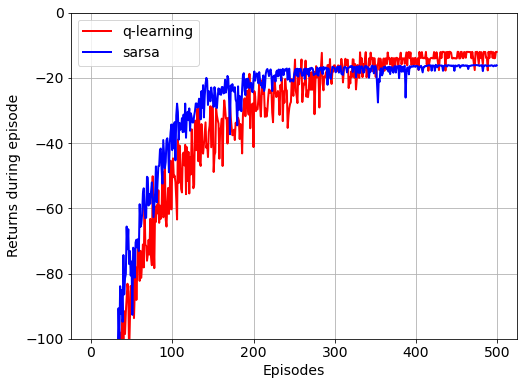

In [16]:
r_q_all=np.array(r_q_all)
r_sarsa_all=np.array(r_sarsa_all)

plt.rcParams['font.size']='14'
plt.figure(figsize=(8,6))
plt.plot(r_q_all.mean(axis=0),'r',label='q-learning',linewidth=2)
plt.plot(r_sarsa_all.mean(axis=0),'b',label='sarsa',linewidth=2)
plt.ylim([-100,0])
plt.legend()
plt.grid()
plt.xlabel('Episodes')
plt.ylabel('Returns during episode')
plt.savefig('sarsa_ql_cliffwalk.png',dpi=350)

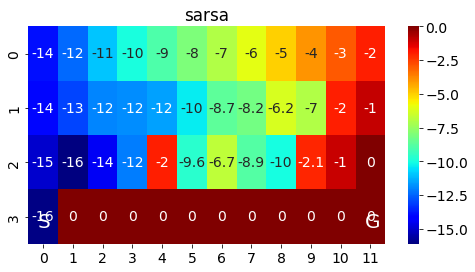

In [6]:
def plot_heat(q,alg='sarsa'):

    q_heat=np.zeros((n_rows,n_cols))

    for i in range(n_rows):
        for j in range(n_cols):
            q_heat[i,j]=np.max(q[i,j])

    plt.figure(figsize=(8,4))
    sns.heatmap(q_heat,cmap='jet',annot=True)
    plt.annotate('S', (0.3,3.7), fontsize=20, color="w")
    plt.annotate('G', (11.3,3.7), fontsize=20, color="w")
    plt.title(alg)
    plt.savefig(alg+'_heatmap_cliffwalk.png',dpi=350)
    
plot_heat(Q_sarsa)

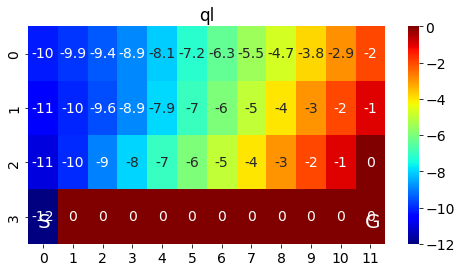

In [7]:
plot_heat(Q_q,alg='ql')

In [8]:
def get_oppi(q,alg='sarsa'):

    op_q=np.zeros((n_rows,n_cols))

    for i in range(n_rows):
        for j in range(n_cols):
            op_q[i,j]=np.argmax(q[i,j])
            
    return op_q

sarsa_op=get_oppi(Q_sarsa,alg='sarsa')
q_op=get_oppi(Q_q,alg='q')

In [9]:
q_op

array([[2., 0., 1., 3., 0., 3., 1., 1., 3., 1., 3., 1.],
       [0., 3., 2., 3., 3., 1., 1., 1., 1., 3., 1., 1.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
sarsa_op

array([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1.],
       [3., 3., 0., 0., 0., 3., 0., 3., 0., 0., 3., 1.],
       [0., 0., 0., 0., 0., 0., 2., 0., 0., 3., 3., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

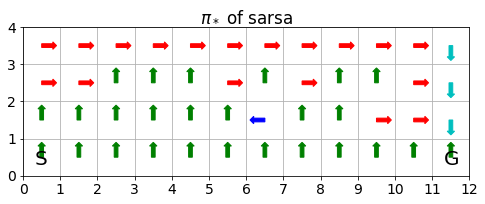

In [11]:
def plot_oppi(q,alg='sarsa'):
    
    op_act=np.zeros((n_rows,n_cols))

    for i in range(n_rows):
        for j in range(n_cols):
            op_act[i,j]=np.argmax(q[i,j])

    nx=12
    ny=4

    scale=0.3
    edge=ny-0.5
    fig=plt.figure(figsize=(8,4))
    ax=fig.add_subplot(1,1,1)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks(np.arange(0,nx+1,1))
    ax.set_yticks(np.arange(0,ny+1,1))
    plt.grid()
    plt.ylim((0,ny))
    plt.xlim((0,nx))

    for i in range(n_rows):
        for j in range(n_cols):
            if op_act[i,j]==0:
                plt.arrow(j+0.5,edge-i,0,scale,width=0.1, head_width=0.2, head_length=0.1,fc='g', ec='g')
            elif op_act[i,j]==1:
                plt.arrow(j+0.5,edge-i,0,-scale,width=0.1, head_width=0.2, head_length=0.1,fc='c', ec='c')
            elif op_act[i,j]==2:
                plt.arrow(j+0.5,edge-i,-scale,0,width=0.1, head_width=0.2, head_length=0.1,fc='b', ec='b')
            elif op_act[i,j]==3:
                #print(i,j)
                plt.arrow(j+0.5,edge-i,scale,0,width=0.1, head_width=0.2, head_length=0.1,fc='r', ec='r')

    plt.annotate('S', (0.3,0.3),fontsize=20)
    plt.annotate('G', (11.3,0.3),fontsize=20)
    plt.title('$\pi_*$ of '+alg)
    plt.savefig(alg+'_oppi_cliffwalk.png',dpi=350)
    
plot_oppi(Q_sarsa,'sarsa')

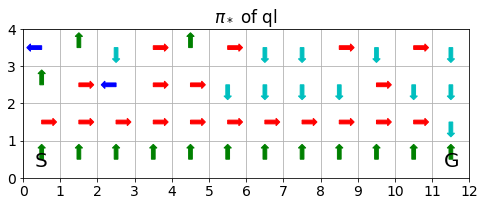

In [12]:
plot_oppi(Q_q,'ql')

In [13]:
Q_q

array([[[-10.36147307, -10.79193672, -10.18566895, -10.30649279],
        [ -9.87666352, -10.05733884, -10.33000359,  -9.98700395],
        [ -9.4519994 ,  -9.42713195, -10.20214232,  -9.50705615],
        [ -9.2077179 ,  -8.91881079,  -9.07500883,  -8.87826488],
        [ -8.06270218,  -8.16145156,  -8.5238579 ,  -8.06927222],
        [ -7.64015159,  -7.57927036,  -7.89510335,  -7.19632112],
        [ -6.375     ,  -6.33314633,  -6.72586963,  -6.36130636],
        [ -5.92285156,  -5.52724433,  -5.59825706,  -5.55274117],
        [ -4.88085938,  -4.78810403,  -5.05630493,  -4.695858  ],
        [ -3.96875   ,  -3.828825  ,  -4.80913544,  -3.83255005],
        [ -3.16210938,  -2.94751522,  -3.19921875,  -2.92352295],
        [ -2.        ,  -1.98948669,  -2.625     ,  -2.25      ]],

       [[-10.54109587, -10.72228849, -10.88253346, -10.65825136],
        [-10.23867416, -10.39548972, -10.11353393, -10.03430567],
        [ -9.92132243,  -9.63192239,  -9.57657429,  -9.62743749],
        

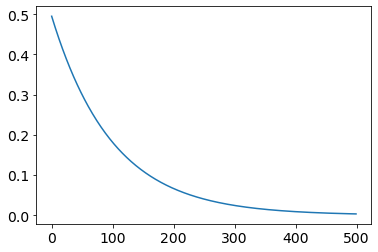

In [15]:
eps=.5
epss=[]

for i in range(500):
    eps*=0.99
    epss.append(eps)
    
plt.plot(epss)